# Question  
Using Python, complete the prediction task outlined in Part B of the case. In particular, develop a model that allows you to predict the probability of employees at the Lyon facility to accept an RCC if it is offered to them. Make sure that your code prints out the predicted probability for each employee (e.g., as a list). What are the most important factors in determining whether an employee will accept an RCC

In [477]:
# importing the required libraries
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition as dcp
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import decomposition as dcp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [478]:
#reading the csv file
df = pd.read_csv('/users/sarthakchawla/Downloads/employee_attrition_previous_closure.csv')

## Getting data from the employee attrition previous closure file

In [479]:
#dropping the missing value
df.dropna(inplace=True)

#setting the employee number as index of the frame
df.set_index('EmployeeNumber', inplace=True)

# convert the categorical variables into dummy variables
df = pd.get_dummies(data=df, columns=['Attrition', 'Department', 'BusinessTravel', 'EducationField','Gender',
'JobLevel','MaritalStatus','OverTime','JobRole','Education','StockOptionLevel'], drop_first=True)

# scaling Variables
df[['DailyRate','MonthlyIncome', 'MonthlyRate']] = preprocessing.scale(df[['DailyRate','MonthlyIncome', 'MonthlyRate']])


# drop columns with identical information
df.drop(columns=['Over18', 'StandardHours','EmployeeCount'], inplace=True)

In [480]:
# Defining X and Y
Y = df["Attrition_Yes"]
X = df.drop(columns=["Attrition_Yes"])

In [481]:
# Determing the correlation betweeen variables
corr = df.corr()
corr.style.background_gradient(cmap='viridis', axis=None)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='viridis', axis=None, vmin=-1, vmax=1)
 .set_precision(2))

/var/folders/20/rw_9jf3s7f75z2kj0w4cq0r80000gn/T/ipykernel_12231/3565804549.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Education_2,Education_3,Education_4,Education_5,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
Age,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DailyRate,0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DistanceFromHome,-0.02,-0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EnvironmentSatisfaction,-0.02,-0.00,-0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HourlyRate,-0.01,0.03,0.03,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
JobInvolvement,0.04,0.03,0.04,-0.01,0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
JobSatisfaction,0.02,0.02,0.02,-0.04,-0.08,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MonthlyIncome,0.50,0.03,-0.01,-0.00,-0.05,-0.01,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MonthlyRate,0.04,-0.01,0.06,0.05,0.01,-0.05,0.01,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NumCompaniesWorked,0.30,0.06,-0.02,-0.00,-0.00,0.03,-0.05,0.14,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## Determining PCA value

In [482]:
# PCA to the dataset 
pca_raw=dcp.PCA(n_components=52)
pca_raw.fit(df)

PCA(n_components=52)

In [483]:
pca_raw.components_

array([[ 1.05283210e-02, -1.66789282e-03, -1.43781356e-02, ...,
         9.82985643e-04, -1.37563340e-03,  2.47844842e-05],
       [ 6.54627590e-01,  2.09911770e-03, -4.78113370e-03, ...,
         6.14635522e-03, -1.07876945e-03, -1.52629476e-03],
       [-5.91969882e-02, -4.56109578e-03,  9.95389394e-01, ...,
        -1.28430686e-03,  2.90304069e-03, -1.02676222e-03],
       ...,
       [ 1.35400026e-05,  3.70332770e-03,  2.60856019e-04, ...,
        -1.86722458e-02, -1.90320790e-02, -1.55177680e-02],
       [ 1.76631704e-04, -5.87029880e-04, -7.51963217e-04, ...,
        -6.80504736e-03, -9.04019872e-03, -1.69455205e-02],
       [-1.30697513e-04,  8.91028392e-05, -1.42763905e-04, ...,
        -6.78255414e-03, -1.32381958e-03, -5.15515773e-03]])

In [484]:
pca_raw.explained_variance_
# provides a statistical measure of the extent of variation in the dataset due to principal constituents


array([4.22678339e+02, 1.48290420e+02, 6.83180737e+01, 5.16914349e+01,
       1.68862461e+01, 1.34052791e+01, 6.41444847e+00, 5.51811449e+00,
       4.33204948e+00, 3.84867879e+00, 1.58311239e+00, 1.25982832e+00,
       1.16929934e+00, 1.13724770e+00, 9.92257979e-01, 9.60877674e-01,
       6.60073975e-01, 5.21152447e-01, 4.74783167e-01, 4.54967475e-01,
       4.24852997e-01, 3.64861832e-01, 3.31053757e-01, 3.01465242e-01,
       2.37936433e-01, 2.20916532e-01, 2.08899615e-01, 1.96207213e-01,
       1.70838563e-01, 1.63004761e-01, 1.45144166e-01, 1.28376647e-01,
       1.12496826e-01, 9.91019729e-02, 8.45601023e-02, 8.08040789e-02,
       7.59565776e-02, 7.41691988e-02, 6.73984642e-02, 6.17047779e-02,
       5.43085413e-02, 4.73380280e-02, 4.51918145e-02, 4.08770337e-02,
       3.81380672e-02, 2.07837457e-02, 1.66775596e-02, 1.47309929e-02,
       1.11714436e-02, 4.26320632e-03, 2.72313456e-03, 2.45361167e-03])

In [485]:
# calculating the sum
explained_variance_ratio_cumul_sum=np.cumsum(pca_raw.explained_variance_ratio_) 
explained_variance_ratio_cumul_sum

array([0.56024972, 0.75680502, 0.84735894, 0.91587466, 0.93825696,
       0.95602533, 0.96452753, 0.97184165, 0.97758367, 0.982685  ,
       0.98478338, 0.98645325, 0.98800313, 0.98951052, 0.99082574,
       0.99209936, 0.99297427, 0.99366504, 0.99429436, 0.9948974 ,
       0.99546054, 0.99594415, 0.99638296, 0.99678254, 0.99709792,
       0.99739074, 0.99766763, 0.9979277 , 0.99815414, 0.9983702 ,
       0.99856258, 0.99873274, 0.99888186, 0.99901321, 0.99912529,
       0.9992324 , 0.99933308, 0.99943139, 0.99952072, 0.99960251,
       0.99967449, 0.99973724, 0.99979714, 0.99985132, 0.99990187,
       0.99992942, 0.99995153, 0.99997105, 0.99998586, 0.99999151,
       0.99999512, 0.99999837])

## Loading the data

In [486]:
df1 = pd.DataFrame(pca_raw.components_[0:4,:].T).set_index(np.arange(1,54))
df1.columns = ['n1','n2','n3','n4']
df1.index = df.columns

In [487]:
pca_sparse=dcp.SparsePCA(alpha=5,n_components=4) 
pca_sparse.fit(df)
df1_sparse=pd.DataFrame(pca_sparse.components_.T).set_index(np.arange(1,54))
df1_sparse.columns = ['n1','n2','n3','n4']
df1_sparse.index = df.columns

In [488]:
#fit and transform the pca function
data_pca1 = pca_raw.fit_transform(df)
df_pca1=pd.DataFrame()
df_pca1["Variable1"]=data_pca1[:, 0].reshape(-1)
df_pca1["Variable2"]=data_pca1[:, 1].reshape(-1)
df_pca1["Variable3"]=data_pca1[:, 2].reshape(-1)
df_pca1["Variable4"]=data_pca1[:, 3].reshape(-1)
df_pca1

,Variable1,Variable2,Variable3,Variable4
0,1.752278,19.332513,-8.832751,7.547987
1,-17.231703,-6.272724,-4.218078,3.776765
2,35.286786,-23.171257,-2.126944,-1.804413
3,-19.549324,13.925146,-3.618927,7.571095
4,11.121342,-0.489522,5.859810,-4.196139
...,...,...,...,...
770,-22.881908,16.614161,-6.908283,-13.170575
771,-28.224295,-4.417256,12.255001,-3.675218
772,-11.764530,3.829877,19.167457,-11.360975
773,20.667923,-9.796880,3.740857,-0.834330


In [489]:
# Fit a logistic regression with vector Y as dependent and matrix X as independent
logm = LogisticRegression(max_iter=1000)
logm.fit(df_pca1, Y.values.ravel())
print(logm.intercept_)
print(logm.coef_)

[-1.78060123]
[[-0.00478499 -0.05692555  0.01366169  0.02406136]]


In [490]:
logm.predict_proba(df_pca1)
Y_probs = logm.predict_proba(df_pca1)[:, 1]

## Updating missing value in the employee attrition Lyon dataset

In [491]:
# reading into the employee_attrition_lyon.csv file 
df2 = pd.read_csv('/Users/sarthakchawla/Downloads/employee_attrition_lyon.csv').iloc[:,:47]
df3 = df2.copy()

In [492]:
df3.set_index('EmployeeNumber', inplace=True)

df3 = pd.get_dummies(data=df3, columns=['EducationField','Gender','Department',
'JobLevel','OverTime','JobRole','Education','StockOptionLevel'], drop_first=True)

df3[['MonthlyIncome', 'MonthlyRate']] = preprocessing.scale(df3[['MonthlyIncome', 'MonthlyRate']])

df3.drop(columns=['Over18', 'StandardHours','EmployeeCount'], axis=1,inplace=True)

# drop columns with missing value to replace with PCA values obtained
df3.drop(columns=['Age', 'BusinessTravel','DailyRate', 'DistanceFromHome','MaritalStatus'], axis=1,inplace=True)

In [493]:
# here we have three features and we are asking for three new variables out of the old variables
pca=dcp.PCA(n_components=45)
pca.fit(df3)

PCA(n_components=45)

In [494]:
# loading the components
pca.components_

array([[-3.69404204e-03,  9.99695091e-01,  1.73285808e-03, ...,
         1.32779060e-03,  9.48998865e-04,  4.75305089e-04],
       [-1.51563973e-03, -2.02422174e-02, -3.32198501e-03, ...,
         2.94247287e-03, -4.45409697e-04,  3.11306578e-04],
       [ 5.16915482e-03, -6.34458029e-03, -1.07778734e-03, ...,
        -2.19212393e-03, -2.91866582e-03,  2.16827841e-03],
       ...,
       [-6.68525197e-04, -2.12747216e-05, -2.92122200e-03, ...,
         3.12858184e-03,  7.63184912e-03, -4.89451096e-02],
       [-1.89025526e-03, -1.98393940e-04,  3.15556324e-03, ...,
        -2.73919686e-03,  2.16190107e-02,  6.94259387e-03],
       [-1.06067426e-03,  1.95162788e-04,  2.16793744e-03, ...,
        -1.15198153e-03, -7.26171223e-03, -1.86253375e-02]])

In [495]:
# getting the new explained variance 
pca.explained_variance_

array([3.95778719e+02, 9.77080272e+01, 2.49672196e+01, 1.33545975e+01,
       6.11031811e+00, 5.51463839e+00, 4.43308693e+00, 3.20399601e+00,
       1.68540803e+00, 1.29743718e+00, 1.19984400e+00, 1.05580024e+00,
       9.94936757e-01, 6.84915775e-01, 5.35034090e-01, 4.89250294e-01,
       4.50962846e-01, 3.62386184e-01, 3.19366638e-01, 2.54937974e-01,
       2.44823972e-01, 2.36031476e-01, 2.12567708e-01, 1.79181923e-01,
       1.68801198e-01, 1.37469840e-01, 1.27793928e-01, 9.30099481e-02,
       8.29463171e-02, 7.67890309e-02, 6.51490266e-02, 5.64932928e-02,
       4.61347554e-02, 4.30070441e-02, 3.90234986e-02, 3.79158267e-02,
       3.30064589e-02, 2.79695991e-02, 1.53874714e-02, 1.35277986e-02,
       9.16025343e-03, 3.55236649e-03, 2.76566872e-03, 2.57566201e-03,
       1.33085918e-03])

In [496]:
# calculating the new total sum
explained_variance_ratio_cumul_sum=np.cumsum(pca.explained_variance_ratio_) 
explained_variance_ratio_cumul_sum

array([0.70378516, 0.87753239, 0.92192983, 0.94567736, 0.9565429 ,
       0.96634919, 0.97423223, 0.97992967, 0.98292671, 0.98523385,
       0.98736745, 0.98924491, 0.99101413, 0.99223207, 0.99318348,
       0.99405348, 0.9948554 , 0.9954998 , 0.99606771, 0.99652105,
       0.9969564 , 0.99737612, 0.99775411, 0.99807274, 0.99837291,
       0.99861736, 0.9988446 , 0.99901   , 0.9991575 , 0.99929404,
       0.99940989, 0.99951035, 0.99959239, 0.99966887, 0.99973826,
       0.99980568, 0.99986438, 0.99991411, 0.99994147, 0.99996553,
       0.99998182, 0.99998814, 0.99999305, 0.99999763, 1.        ])

In [497]:

df1=pd.DataFrame(pca.components_[0:3,:].T).set_index(np.arange(1,46))
df1.columns = ['n1','n2','n3']
df1.index = df3.columns

In [498]:
pca_sparse=dcp.SparsePCA(alpha=5,n_components=3) #To explain better of the variables in the new dataset
pca_sparse.fit(df3)
df1_sparse=pd.DataFrame(pca_sparse.components_.T).set_index(np.arange(1,46))
df1_sparse.columns = ['z1','z2','z3']
df1_sparse.index = df3.columns

In [499]:
data_pca = pca.fit_transform(df3)
df_pca=pd.DataFrame()
df_pca["Variable1"]=data_pca[:, 0].reshape(-1)
df_pca["Variable2"]=data_pca[:, 1].reshape(-1)
df_pca["Variable3"]=data_pca[:, 2].reshape(-1)
df_pca

,Variable1,Variable2,Variable3
0,19.774518,-6.243388,-2.821601
1,-7.199058,-7.267553,-1.853010
2,-6.314211,-13.337362,-1.516358
3,-4.924802,2.945098,15.283876
4,-1.875364,8.978110,-1.486042
...,...,...,...
436,-10.233754,-7.285192,-2.295748
437,8.815298,-5.551299,-2.922008
438,19.810829,-8.516285,-0.609442
439,-22.005079,-0.367934,4.210527


## Dividing the data into two using k-means

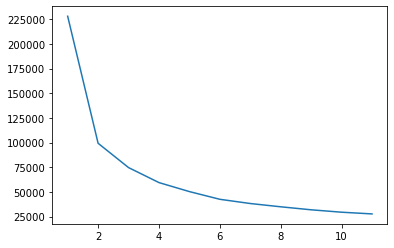

In [500]:
from sklearn.cluster import KMeans
inertia_K=[]
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1)
    kmeanModel.fit(df_pca)
    inertia_K.append(kmeanModel.inertia_)
plt.plot(K,inertia_K)
plt.show()

In [501]:
# dividing the employees into two  groups
kmeans = KMeans(n_clusters=2, random_state=1).fit(df_pca)
kmeans.labels_

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [502]:
#  coordinates of cluster centers
kmeans.cluster_centers_

array([[ 18.41707482,  -0.05970498,   0.03373421],
       [-15.852672  ,   0.05139163,  -0.02903704]])

In [503]:
# Appends the list  to the df2  to fill the missing values
df2['cluster'] = list(kmeans.labels_)

In [504]:
#grouping the 
cluster_group = df2.groupby('cluster').mean()

In [505]:
cluster_group

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
cluster,,,,,,,,,,,,,,,,,,,,,
0,38.305556,785.862944,10.316092,2.995098,1.0,1060.573529,2.754902,82.460784,2.833333,2.147059,...,2.803922,80.0,0.813725,11.750000,2.799020,2.808824,7.318627,4.132353,2.622549,4.352941
1,37.733010,813.891304,8.760563,2.932489,1.0,996.291139,2.860759,48.202532,2.713080,2.080169,...,2.729958,80.0,0.654008,11.236287,2.873418,2.776371,7.025316,4.371308,2.109705,4.434599


## Filling the missing values using PCA and k-means

In [506]:
from collections import Counter

In [507]:
Counter(list(df2['MaritalStatus']))

Counter({'Single': 150, 'Divorced': 95, 'Married': 193, nan: 3})

In [508]:
Counter(list(df2['BusinessTravel']))

Counter({'Travel_Rarely': 311,
         'Non-Travel': 48,
         'Travel_Frequently': 77,
         nan: 5})

In [509]:
# filling in the missing value of the dataset with the values we obtained in k-means
df2['BusinessTravel'].fillna('Travel_Rarely', inplace=True)
df2['MaritalStatus'].fillna('Married', inplace=True)

df2.loc[(df2['cluster'] == 0),'DailyRate'] = df2.loc[(df2['cluster'] == 0),'DailyRate'].fillna(value=round(cluster_group.loc[0,'DailyRate']))
df2.loc[(df2['cluster'] == 1),'DailyRate'] = df2.loc[(df2['cluster'] == 1),'DailyRate'].fillna(value=round(cluster_group.loc[1,'DailyRate']))
df2.loc[(df2['cluster'] == 0),'DistanceFromHome'] = df2.loc[(df2['cluster'] == 0),'DistanceFromHome'].fillna(value=round(cluster_group.loc[0,'DistanceFromHome']))
df2.loc[(df2['cluster'] == 1),'DistanceFromHome'] = df2.loc[(df2['cluster'] == 1),'DistanceFromHome'].fillna(value=round(cluster_group.loc[1,'DistanceFromHome']))

# fill missing values of age
df2.loc[(df2['cluster'] == 0),'Age'] = df2.loc[(df2['cluster'] == 0),'Age'].fillna(value=round(cluster_group.loc[0,'Age']))
df2.loc[(df2['cluster'] == 1),'Age'] = df2.loc[(df2['cluster'] == 1),'Age'].fillna(value=round(cluster_group.loc[1,'Age']))

## Data Processing and Cleaning

In [510]:
#setting the employee number as index value
df2.set_index('EmployeeNumber', inplace=True) 

# converting the categorical variables into dummies
df2 = pd.get_dummies(data=df2, columns=['Department', 'BusinessTravel', 'EducationField','Gender',
'JobLevel','MaritalStatus','OverTime','JobRole','Education','StockOptionLevel'], drop_first=True)

# scaling Variables
df2[['MonthlyIncome', 'MonthlyRate']] = preprocessing.scale(df2[['MonthlyIncome', 'MonthlyRate']])


# drop the columns that provide identical information
df2.drop(columns=['Over18', 'StandardHours','EmployeeCount','cluster'], inplace=True)

## Prediction Model

In [511]:
# finding PCA of df2 to do logistic regression 
data_pca = pca_raw.fit_transform(df2)
df_pca=pd.DataFrame()
df_pca["Variable1"]=data_pca[:, 0].reshape(-1)
df_pca["Variable2"]=data_pca[:, 1].reshape(-1)
df_pca["Variable3"]=data_pca[:, 2].reshape(-1)
df_pca["Variable4"]=data_pca[:, 3].reshape(-1)

In [512]:
# Probability of each employee to leave the company 
Y_probs = logm.predict_proba(df_pca)[:,1]

In [513]:
Y_probs

array([3.59968434e-02, 7.20450218e-02, 7.86562246e-01, 1.79502202e-02,
       1.09601513e-02, 9.54891726e-01, 9.34763799e-01, 1.01493897e-03,
       7.85466557e-02, 8.89662148e-02, 5.97655898e-03, 5.14146013e-01,
       4.53570933e-01, 7.70998152e-02, 2.56155554e-01, 4.98598908e-03,
       3.12375695e-01, 3.22310262e-01, 1.18042435e-01, 1.00937556e-01,
       6.20673164e-01, 6.05359252e-02, 5.24464815e-02, 8.35385258e-01,
       4.86997355e-02, 2.98929856e-01, 1.28251947e-01, 4.88651104e-01,
       2.04643112e-02, 1.79732391e-01, 7.31290692e-01, 2.03917353e-01,
       4.10005953e-01, 1.58550307e-01, 1.18729547e-03, 2.24541904e-02,
       8.30165938e-01, 2.81960940e-02, 1.63976062e-02, 1.47166746e-02,
       2.33769624e-01, 3.25848911e-02, 2.09968025e-02, 7.49028403e-02,
       8.80009254e-01, 4.79235910e-02, 7.97701420e-01, 7.77955384e-01,
       5.76662923e-01, 7.65383623e-02, 1.16409447e-01, 6.67003991e-02,
       4.36927674e-01, 4.03405607e-01, 1.15822274e-01, 4.91060708e-02,
      

## Testing the significance of the Variables for Prediction

In [514]:
import statsmodels.api as sm
X = df.drop(columns=['Attrition_Yes'])
Y = df[['Attrition_Yes']]

X = sm.add_constant(X)


lm = sm.OLS(Y, X).fit()


print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          Attrition_Yes   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     6.157
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           7.05e-32
Time:                        13:46:51   Log-Likelihood:                -189.69
No. Observations:                 775   AIC:                             485.4
Df Residuals:                     722   BIC:                             732.0
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

# Question

Formulate the problem outlined in Part C of the case as an optimization problem. Be sure to clarify what are the key elements of the problem as learned in class.

# Question  
Open Starting_model.xlsx. Each employee is given with a probability of accepting an RCC (please use this probability, not the one you predicted). Determine employee categories which may or may not be opened up to RCCs. In the xlsx file, employees have been assigned at random to placeholder categories - make sure to overwrite the group assignments based on your choices and modify the optimization problem accordingly. Moreover, make sure to justify your choice of employee categories, especially in light of possible discrimination issues.

In [515]:
#reading into the Starting_model file
df_starting_model = pd.read_excel('/Users/sarthakchawla/Downloads/Starting_model.xlsx', index_col= 0).iloc[:,:47]

In [516]:
dfQ = df_starting_model.copy()

In [517]:
#setting emmployee number as index value
df_starting_model.set_index('EmployeeNumber', inplace=True)

#dropping missing values
df_starting_model.dropna(axis=1, inplace=True) 

# converting the categorical variables into dummies
df_starting_model = pd.get_dummies(data=df_starting_model, columns=['EducationField','Gender',
'JobLevel','OverTime','JobRole','Education','StockOptionLevel'], drop_first=True)

# scaling Variables
df_starting_model[['MonthlyIncome', 'MonthlyRate']] = preprocessing.scale(df_starting_model[['MonthlyIncome', 'MonthlyRate']])


# dropping the columns that provide the same information
df_starting_model.drop(columns=['Over18', 'StandardHours','EmployeeCount','Department'], inplace=True)

In [518]:
df_starting_model.isna().any()

Flag Sales                         False
Flag HR                            False
Flag R&D                           False
EnvironmentSatisfaction            False
HourlyRate                         False
JobInvolvement                     False
Healthcare Representative Flag     False
Human Resources Flag               False
Laboratory Technician Flag         False
Manager                            False
Manufacturing Director             False
Research Director                  False
Research Scientist                 False
Sales Executive                    False
Sales Representative               False
JobSatisfaction                    False
MonthlyIncome                      False
MonthlyRate                        False
NumCompaniesWorked                 False
PercentSalaryHike                  False
PerformanceRating                  False
RelationshipSatisfaction           False
TotalWorkingYears                  False
TrainingTimesLastYear              False
WorkLifeBalance 

In [519]:
# Checking the columns
df_starting_model.columns

Index(['Flag Sales', 'Flag HR', 'Flag R&D', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'Healthcare Representative Flag',
       'Human Resources Flag', 'Laboratory Technician Flag', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Prob (take RCC)',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'JobLevel_5', 'OverTime_Yes',
       'JobRole_Human Resources', 'JobRole_La

In [520]:
pca=dcp.PCA(n_components=56) 
pca.fit(df_starting_model)


PCA(n_components=56)

In [521]:
pca.components_

array([[ 4.69512881e-04, -9.60600453e-04,  4.91087571e-04, ...,
         1.32788221e-03,  9.48974424e-04,  4.75326144e-04],
       [ 2.03776270e-03, -2.79343423e-04, -1.75841928e-03, ...,
         2.94241365e-03, -4.44602372e-04,  3.11676821e-04],
       [-3.62849704e-03, -6.29576857e-04,  4.25807390e-03, ...,
        -2.19205439e-03, -2.91684202e-03,  2.16963574e-03],
       ...,
       [-0.00000000e+00, -1.27675648e-15, -1.65916101e-15, ...,
        -1.11889664e-16, -1.41379963e-16,  1.02131845e-16],
       [-0.00000000e+00, -2.77555756e-15, -1.96718096e-15, ...,
        -2.23779328e-16, -6.93889390e-18,  1.19695920e-16],
       [ 0.00000000e+00,  4.02976263e-15, -3.98139945e-17, ...,
        -2.05564732e-16, -1.79327039e-16,  7.04731412e-18]])

In [522]:
pca.explained_variance_

array([3.95780078e+02, 9.77373210e+01, 2.49748349e+01, 1.33569778e+01,
       6.11346566e+00, 5.52448224e+00, 4.43671169e+00, 3.20559190e+00,
       1.68602258e+00, 1.30105090e+00, 1.20049349e+00, 1.06036078e+00,
       1.02027661e+00, 8.56713960e-01, 5.38494470e-01, 4.99333214e-01,
       4.84474455e-01, 3.78417831e-01, 3.56730663e-01, 3.21197621e-01,
       2.90918910e-01, 2.49080582e-01, 2.44551897e-01, 2.22060932e-01,
       1.81317147e-01, 1.79477822e-01, 1.60840107e-01, 1.37064055e-01,
       1.31655624e-01, 1.07424696e-01, 8.63804120e-02, 8.22569623e-02,
       7.54981199e-02, 5.45624556e-02, 4.31481913e-02, 4.21590053e-02,
       4.02571770e-02, 3.20173335e-02, 2.95696025e-02, 2.02503235e-02,
       1.37473198e-02, 1.06333921e-02, 8.46791001e-03, 5.23702784e-03,
       2.65666436e-03, 1.91912771e-03, 2.86021381e-30, 2.43464846e-30,
       2.43464846e-30, 2.43464846e-30, 2.43464846e-30, 2.43464846e-30,
       2.43464846e-30, 2.43464846e-30, 2.43464846e-30, 1.69410251e-30])

In [523]:
#  cumulative sum
explained_variance_ratio_cumul_sum=np.cumsum(pca.explained_variance_ratio_)
explained_variance_ratio_cumul_sum

array([0.702627  , 0.87613972, 0.92047746, 0.94419005, 0.95504327,
       0.96485086, 0.97272734, 0.97841822, 0.98141141, 0.98372116,
       0.98585239, 0.98773485, 0.98954614, 0.99106706, 0.99202305,
       0.99290951, 0.9937696 , 0.9944414 , 0.99507471, 0.99564493,
       0.99616139, 0.99660359, 0.99703774, 0.99743196, 0.99775385,
       0.99807248, 0.99835802, 0.99860135, 0.99883508, 0.99902579,
       0.99917914, 0.99932517, 0.9994592 , 0.99955606, 0.99963266,
       0.99970751, 0.99977898, 0.99983582, 0.99988831, 0.99992426,
       0.99994867, 0.99996755, 0.99998258, 0.99999188, 0.99999659,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [524]:
df1=pd.DataFrame(pca.components_[0:3,:].T).set_index(np.arange(1,57))
df1.columns = ['n1','n2','n3']
df1.index = df_starting_model.columns

In [525]:
data_pca = pca.fit_transform(df_starting_model)
df_pca=pd.DataFrame()
df_pca["Variable1"]=data_pca[:, 0].reshape(-1)
df_pca["Variable2"]=data_pca[:, 1].reshape(-1)
df_pca["Variable3"]=data_pca[:, 2].reshape(-1)
df_pca

,Variable1,Variable2,Variable3
0,19.774465,-6.240128,-2.822476
1,-7.198799,-7.264135,-1.847764
2,-6.316120,-13.336338,-1.510702
3,-4.925027,2.939449,15.278210
4,-1.875087,8.971346,-1.491697
...,...,...,...
436,-10.233775,-7.281274,-2.296603
437,8.815246,-5.548070,-2.923599
438,19.810060,-8.524405,-0.612011
439,-22.006704,-0.367148,4.211738


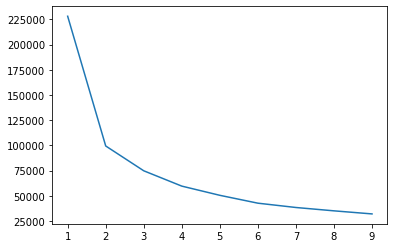

In [526]:
inertia_K=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1)
    kmeanModel.fit(df_pca)
    inertia_K.append(kmeanModel.inertia_)
plt.plot(K,inertia_K)
plt.show()

In [527]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(df_pca)
kmeans.labels_

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [528]:
# finding the k means cluster centers
kmeans.cluster_centers_

array([[ 18.41713284,  -0.05974404,   0.03365381],
       [-15.85272194,   0.05142525,  -0.02896784]])

In [529]:
k_list = list(kmeans.labels_)
dfQ['cluster'] = k_list
dfQ.T

ID,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
Age,NaN,53.0,24.0,45.0,36.0,34.0,NaN,39.0,45.0,NaN,...,54.0,37.0,33.0,50.0,49.0,33.0,27.0,NaN,39.0,NaN
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,...,Travel_Rarely,Non-Travel,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,866.0,1084.0,240.0,1339.0,1396.0,204.0,144.0,1431.0,1052.0,1229.0,...,376.0,1413.0,NaN,410.0,470.0,430.0,210.0,1157.0,1383.0,104.0
Department,Sales,Research & Development,Human Resources,Research & Development,Research & Development,Sales,Research & Development,Research & Development,Sales,Research & Development,...,Research & Development,Research & Development,Sales,Sales,Research & Development,Sales,Sales,Research & Development,Human Resources,Research & Development
Flag Sales,1,0,0,0,0,1,0,0,1,0,...,0,0,1,1,0,1,1,0,0,0
Flag HR,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Flag R&D,0,1,0,1,1,0,1,1,0,1,...,1,1,0,0,1,0,0,1,0,1
DistanceFromHome,NaN,13.0,22.0,7.0,NaN,14.0,22.0,1.0,6.0,8.0,...,19.0,NaN,8.0,28.0,20.0,7.0,1.0,2.0,2.0,2.0
Education,3,2,1,3,2,3,3,4,3,1,...,4,2,1,3,4,3,1,4,3,3
EducationField,Medical,Medical,Human Resources,Life Sciences,Life Sciences,Technical Degree,Life Sciences,Medical,Medical,Life Sciences,...,Medical,Technical Degree,Life Sciences,Marketing,Medical,Medical,Marketing,Medical,Life Sciences,Life Sciences


In [530]:
cluster1 = dfQ.groupby('cluster')
cluster_group= cluster1.mean()

In [531]:
# finding the columns
from collections import Counter
dfQ.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'Flag Sales',
       'Flag HR', 'Flag R&D', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'Healthcare Representative Flag',
       'Human Resources Flag', 'Laboratory Technician Flag', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Prob (take RCC)', 'cluster'],
      dtype='objec

In [532]:
cluster_group

,Age,DailyRate,Flag Sales,Flag HR,Flag R&D,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Prob (take RCC)
cluster,,,,,,,,,,,,,,,,,,,,,
0,38.305556,785.862944,0.323529,0.019608,0.656863,10.316092,2.995098,1.0,1060.573529,2.754902,...,80.0,0.813725,11.750000,2.799020,2.808824,7.318627,4.132353,2.622549,4.352941,0.136689
1,37.733010,813.891304,0.291139,0.071730,0.637131,8.760563,2.932489,1.0,996.291139,2.860759,...,80.0,0.654008,11.236287,2.873418,2.776371,7.025316,4.371308,2.109705,4.434599,0.161579


In [533]:
Counter(list(dfQ['MaritalStatus']))

Counter({'Single': 150, 'Divorced': 95, 'Married': 193, nan: 3})

In [534]:
Counter(list(dfQ['BusinessTravel']))

Counter({'Travel_Rarely': 311,
         'Non-Travel': 48,
         'Travel_Frequently': 77,
         nan: 5})

## Filling in Missing value

In [535]:
# filling in missing value from k-mean results
dfQ['BusinessTravel'].fillna('Travel_Rarely', inplace=True)
dfQ['MaritalStatus'].fillna('Married', inplace=True)

dfQ.loc[(dfQ['cluster'] == 0),'DailyRate'] = dfQ.loc[(dfQ['cluster'] == 0),'DailyRate'].fillna(value=round(cluster_group.loc[0,'DailyRate']))
df_ori.loc[(dfQ['cluster'] == 1),'DailyRate'] = dfQ.loc[(dfQ['cluster'] == 1),'DailyRate'].fillna(value=round(cluster_group.loc[1,'DailyRate']))


dfQ.loc[(dfQ['cluster'] == 0),'DistanceFromHome'] = dfQ.loc[(dfQ['cluster'] == 0),'DistanceFromHome'].fillna(value=round(cluster_group.loc[0,'DistanceFromHome']))
dfQ.loc[(dfQ['cluster'] == 1),'DistanceFromHome'] = dfQ.loc[(dfQ['cluster'] == 1),'DistanceFromHome'].fillna(value=round(cluster_group.loc[1,'DistanceFromHome']))



In [536]:
# fill missing values of age
dfQ.loc[(dfQ['cluster'] == 0),'Age'] = dfQ.loc[(dfQ['cluster'] == 0),'Age'].fillna(value=round(cluster_group.loc[0,'Age']))
dfQ.loc[(dfQ['cluster'] == 1),'Age'] = dfQ.loc[(dfQ['cluster'] == 1),'Age'].fillna(value=round(cluster_group.loc[1,'Age']))

## Pre-processing the data

In [537]:
# converting the categorical variables into dummies
dfQ = pd.get_dummies(data=dfQ, columns=['BusinessTravel', 'EducationField',
'JobLevel','OverTime','JobRole','StockOptionLevel'], drop_first=True)

# scaling Variables
dfQ[['MonthlyIncome', 'MonthlyRate']] = preprocessing.scale(dfQ[['MonthlyIncome', 'MonthlyRate']])


# dropping the columns that provide the same information
dfQ.drop(columns=['Over18', 'StandardHours','EmployeeCount', 'Department','cluster','Flag Sales'], inplace=True)

#removing the columns that discriminates
dfQ.drop(columns=['Age','MaritalStatus','Gender','Education'], inplace=True)

## Using k-means to determine the groups

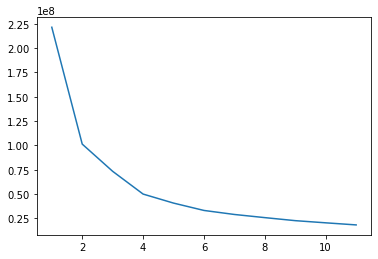

In [538]:
inertia_K=[]
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=666)
    kmeanModel.fit(df_pca2)
    inertia_K.append(kmeanModel.inertia_)
plt.plot(K,inertia_K)
plt.show()

In [539]:
kmeans = KMeans(n_clusters=8,random_state=666).fit(df_pca2)
kmeans.labels_

array([2, 1, 7, 1, 1, 5, 5, 1, 1, 1, 6, 4, 0, 1, 7, 2, 7, 0, 3, 2, 5, 1,
       4, 5, 2, 2, 0, 0, 6, 3, 7, 0, 0, 0, 2, 0, 4, 0, 1, 2, 3, 2, 2, 6,
       5, 1, 4, 5, 5, 4, 1, 3, 3, 4, 2, 6, 3, 2, 0, 7, 7, 6, 6, 0, 6, 3,
       1, 7, 1, 2, 7, 3, 5, 3, 6, 3, 7, 0, 4, 4, 6, 5, 7, 5, 4, 2, 2, 1,
       0, 3, 1, 3, 7, 5, 1, 1, 2, 1, 4, 1, 3, 0, 6, 6, 6, 0, 1, 2, 3, 5,
       2, 2, 6, 6, 1, 1, 1, 1, 2, 2, 6, 6, 6, 7, 5, 5, 6, 4, 5, 5, 7, 2,
       1, 0, 6, 4, 1, 5, 3, 0, 0, 5, 2, 1, 7, 2, 1, 4, 3, 3, 3, 4, 3, 3,
       6, 3, 2, 3, 4, 1, 2, 5, 7, 7, 2, 0, 3, 2, 1, 1, 1, 2, 2, 4, 1, 6,
       2, 3, 2, 7, 6, 5, 3, 2, 1, 5, 7, 1, 7, 0, 2, 1, 4, 7, 2, 4, 6, 0,
       2, 1, 5, 6, 4, 5, 0, 3, 3, 2, 2, 5, 4, 5, 2, 4, 7, 1, 3, 6, 5, 6,
       3, 1, 3, 4, 7, 6, 2, 2, 6, 0, 0, 1, 4, 2, 4, 4, 7, 6, 0, 1, 3, 4,
       0, 6, 5, 7, 1, 2, 1, 2, 4, 5, 3, 3, 7, 1, 1, 5, 6, 2, 5, 6, 2, 2,
       6, 0, 3, 1, 5, 7, 1, 2, 2, 3, 2, 2, 6, 5, 2, 2, 0, 3, 2, 4, 1, 7,
       4, 6, 5, 5, 5, 6, 1, 5, 4, 4, 1, 7, 7, 2, 4,

In [540]:
kmeans.cluster_centers_

array([[-9.36224013e+01, -6.24245385e-01, -1.50855629e+00],
       [-6.79550770e+02,  3.65447381e+02, -1.12849124e+00],
       [ 6.39875230e+02,  2.90526704e+02, -2.89648748e-02],
       [-7.66992061e+02, -2.27942347e+02,  5.32897260e+00],
       [ 3.58571886e+02, -4.08235826e+02,  2.67117818e+00],
       [-3.52524487e+02, -5.21635021e+02, -4.04536678e+00],
       [ 1.53199471e+02,  4.71035233e+02,  6.39302838e-01],
       [ 8.25117981e+02, -2.58827858e+02, -1.27043434e+00]])

## Put results to excel

In [541]:
df_adj = pd.read_excel('Starting_model.xlsx').iloc[:,:59]
labels = kmeans.labels_
# find the index of labels what equals to 0
index_0 = np.where(labels == 0)[0]
index_1 = np.where(labels == 1)[0]
index_2 = np.where(labels == 2)[0]
index_3 = np.where(labels == 3)[0]
index_4 = np.where(labels == 4)[0]
index_5 = np.where(labels == 5)[0]
index_6 = np.where(labels == 6)[0]
index_7 = np.where(labels == 7)[0]

In [542]:
names=  locals()
for ind,col in enumerate(["Severance Group 1","Severance Group 2","Severance Group 3","Severance Group 4","Severance Group 5","Severance Group 6","Severance Group 7","Severance Group 8"]):
    df_adj[col] =  np.nan
    df_adj[col][names[f"index_{ind}"]] = 1
    df_adj[col].fillna(0,inplace=True)

/var/folders/20/rw_9jf3s7f75z2kj0w4cq0r80000gn/T/ipykernel_12231/1489684318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adj[col][names[f"index_{ind}"]] = 1
/var/folders/20/rw_9jf3s7f75z2kj0w4cq0r80000gn/T/ipykernel_12231/1489684318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adj[col][names[f"index_{ind}"]] = 1
/var/folders/20/rw_9jf3s7f75z2kj0w4cq0r80000gn/T/ipykernel_12231/1489684318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

# Question   
In your Solver model, define the severance cost for each employee (the current values are randomly generated), based on the case description.

In [543]:
for ind, row in df_adj.iterrows():
    if row["TotalWorkingYears"] < 15:
        packages = row["MonthlyIncome"] /4 *row["TotalWorkingYears"] + row["MonthlyIncome"]
        df_adj.loc[ind, "Severance Package"] = packages
    elif row["TotalWorkingYears"] >= 15:
        packages = row["MonthlyIncome"] /3*row["TotalWorkingYears"] + row["MonthlyIncome"] * 3
        df_adj.loc[ind, "Severance Package"] = packages

# Question   
Solve the optimization problem using Excel Solver. Be sure to note which groups are opened up to RCC, as well as the cost you achieve.

# Question  
The optimization problem is incomplete. Add the following two constraints: (i) The average yearly amount gained from salary cuts must be greater than the savings expected by management and found in part A; (ii) In each of the three departments, at least 80% of the employees have to stay on. With the additional constraints, solve the problem again. How do the decision variables and the objective change?

# Question  
Ensure that, given the optimal solution, whether an employee is offered an RCC is not implicitly linked to sensitive variables such as gender. Make sure you describe how you would verify this.

In [544]:
#dropping groups that can cause discrimination
df_comp = df_adj[['Age', 'MaritalStatus','Gender','Education','RCC offered']]
df_comp.dropna(inplace=True)
df_comp = pd.get_dummies(data= df_comp, columns=['Gender', 'MaritalStatus'], drop_first=True)
# Find the mean
df_comp.mean()

/var/folders/20/rw_9jf3s7f75z2kj0w4cq0r80000gn/T/ipykernel_12231/1239601970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp.dropna(inplace=True)


Age                      37.945170
Education                 2.976501
RCC offered               0.650131
Gender_Male               0.590078
MaritalStatus_Married     0.438642
MaritalStatus_Single      0.339426
dtype: float64

In [545]:
# Comparing the means
df_0 = df_comp[(df_comp['RCC offered'] == 0)]
df_1 = df_comp[(df_comp['RCC offered'] == 1)]
df_comp.dropna(inplace=True)
df_comp = df_comp.groupby('RCC offered').mean()
df_comp

,Age,Education,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
RCC offered,,,,,
0,38.037313,2.917910,0.641791,0.425373,0.313433
1,37.895582,3.008032,0.562249,0.445783,0.353414


From this comparison, the difference is very minimal, indicating that the sensitive variables don't influence whether an employee will be offered an RCC or not.

# Question    
Discuss possible pros and cons of the optimization approach. What are the assumptions you are making implicitly, and how likely are they to be fulfilled?